Hola **Ann**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por mantener esta sección introductoria ya que ayuda a entender el que y cómo de tu proyecto antes de revisar cada celda, te animo a mantener esta buena práctica!
</div>

## Preparación

In [1]:
# 1. Librerías estándar de Python
import math  

# 2. Librerías de terceros
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

Sugerencia realizada

Visualización de los datos

In [2]:
df=pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
display(df)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


Revisión de los datos

In [3]:
df.isnull().sum()
df.duplicated().sum()
df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


## Análisis

Análisis gráfico de los datos

In [4]:
df.sort_index(inplace=True)
df = df.resample('1H').sum()

<AxesSubplot:xlabel='datetime'>

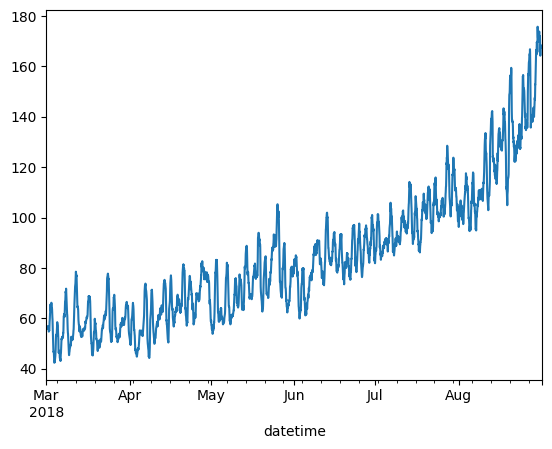

In [5]:
decomposed = seasonal_decompose(df)

decomposed.trend.plot(ax=plt.gca())

El análisis gráfico se hizo con ayuda del metodo rasample, usando una frecuancia temporal de 'hora', asi como del método seasonal_decompose para el analisis temporal de la tendencia (trend). El grafico anterior corresponde a la tendencia de los datos a lo largo de los meses. Se observa que el número de ordenes aumenta conforme pasan los meses, pero también hay un cambio la intensidad del patron durante el día cambia.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la gráfica y exploración, pero cuando se haga una exploración de los datos y se presenten gráficas siempre debe acompañarse de una conclusión de las mismas para que sea claro lo que se puede interpretar de las gráficas mostradas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre procura redactar interpretaciones o conclusiones de cada gráfica presentada
</div>

## Formación

In [6]:
def make_features(data, max_lag, rolling_mean_size):   #lag_hour
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, dividiste los datos en los sets necesarios y extrajiste características extra para darle más información al modelo, esto es un paso importante para asegurar un correcto desempeño
</div>

In [7]:
make_features(df, 8, 3)

train_valid, test = train_test_split(df, shuffle=False, test_size=0.2)
train, valid = train_test_split(train_valid, shuffle=False, test_size=0.2)
train = train.dropna()



features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test =  test.drop(['num_orders'], axis=1)
target_test = test['num_orders']
features_valid =  valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)
train_pred = model.predict(features_train)
valid_pred = model.predict(features_valid)

print(df)
print("RMSE para el conjunto de entrenamiento:", math.sqrt(mean_squared_error(target_train, train_pred)))
print("RMSE para el conjunto de prueba:", math.sqrt(mean_squared_error(target_valid, valid_pred)))


                     num_orders  month  day  dayofweek  hour  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124      3    1          3     0    NaN    NaN   
2018-03-01 01:00:00          85      3    1          3     1  124.0    NaN   
2018-03-01 02:00:00          71      3    1          3     2   85.0  124.0   
2018-03-01 03:00:00          66      3    1          3     3   71.0   85.0   
2018-03-01 04:00:00          43      3    1          3     4   66.0   71.0   
...                         ...    ...  ...        ...   ...    ...    ...   
2018-08-31 19:00:00         136      8   31          4    19  207.0  217.0   
2018-08-31 20:00:00         154      8   31          4    20  136.0  207.0   
2018-08-31 21:00:00         159      8   31          4    21  154.0  136.0   
2018-08-31 22:00:00         223      8   31          4    22  159.0  154.0   
2018-08-31 23:00:00         205      8   31          4    23  22

Conclusión final

Sweet Lift Taxi ha recopilado datos sobre la demanda de taxis en los aeropuertos con el objetivo de optimizar la disponibilidad de conductores durante las horas pico. Para lograrlo, se desarrolló un modelo de predicción que estima la cantidad de pedidos de taxis en la próxima hora.
Para tal estimacion, se ha usado el modelo LinearRegression(), con el que se obtuvo un RMSE de 27.6 para el conjunto de datos creado para el entrenamiento, y 33.92 en el conjunto de prueba.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Llegaste a la métrica objetivo, buen trabajo! Recuerda que todos tus proyectos deben venir acompañados de una conclusión final que resuma lo realizado en el proyecto, en este caso puedes redactar cómo las diferentes features que le pasas al modelo alteran la métrica de evaluación del mismo o algo similar. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, ahora es mucho más claro el proyecto desarrollado. En este proyecto pudiste observar la importancia de pasar las features correctas a un modelo y así obtener mejores resultados en sus métricas. 
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48